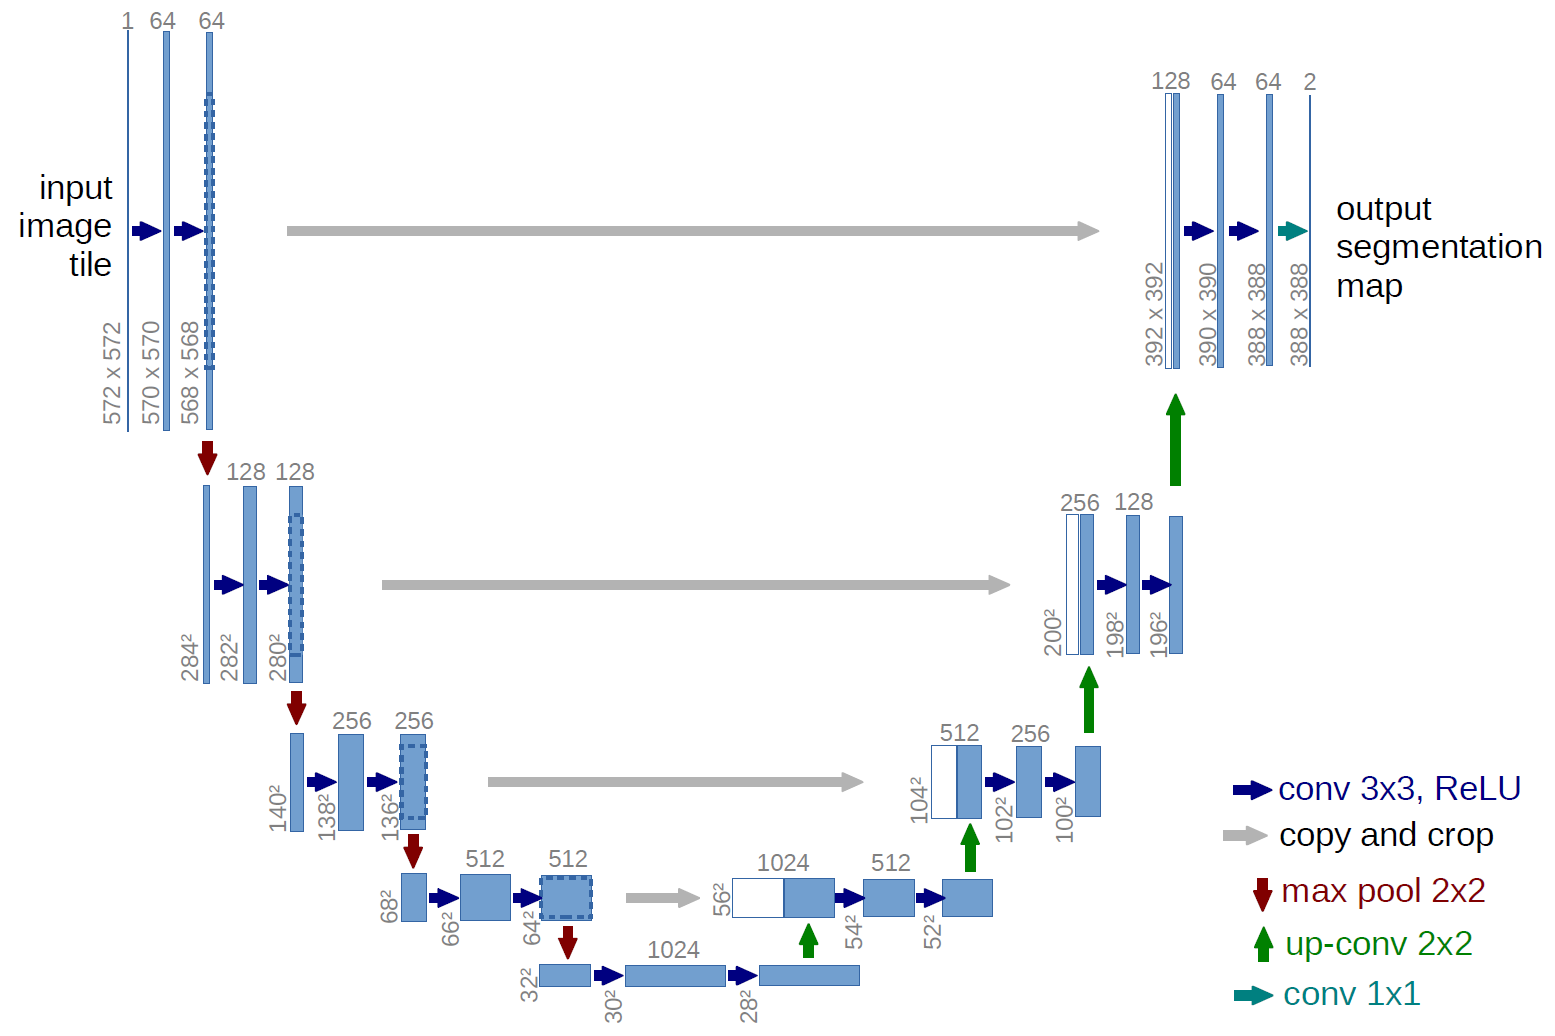


In [113]:
import torch
import torch.nn as nn


In [114]:
def conv_block(in_channel, out_channel):
    return nn.Sequential(
        nn.Conv2d(in_channels=in_channel,
                  out_channels=out_channel, kernel_size=(3, 3),),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=out_channel,
                  out_channels=out_channel, kernel_size=(3, 3)),
        nn.ReLU(inplace=True)
    )


def up_conv_block(in_channel, out_channel):
    return nn.ConvTranspose2d(in_channels=in_channel, out_channels=out_channel, kernel_size=2,stride=2)


def copy_and_crop(left_tensor,right_tensor):
    diff = left_tensor.shape[2]-right_tensor.shape[2]
    start=diff//2
    end=left_tensor.shape[2]-diff//2
    left_tensor=left_tensor[:,:,start:end,start:end]
    return torch.cat((left_tensor,right_tensor),1)

In [115]:
class UNet(nn.Module):
    def __init__(self, in_channels,out_channels):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.conv1 = conv_block(self.in_channels, 64) #
        self.conv2 = conv_block(64, 128) #
        self.conv3 = conv_block(128, 256) #
        self.conv4 = conv_block(256, 512) #
        self.conv5 = conv_block(512, 1024)
        self.conv6 = up_conv_block(1024, 512)
        self.conv7 = conv_block(1024, 512)
        self.conv8 = up_conv_block(512, 256)
        self.conv9 = conv_block(512, 256)
        self.conv10 = up_conv_block(256, 128)
        self.conv11 = conv_block(256, 128)
        self.conv12 = up_conv_block(128, 64)
        self.conv13 = conv_block(128,64)

    def forward(self, x):
        print(x.shape)
        out1 = self.conv1(x)
        out2 = self.conv2(nn.MaxPool2d(2)(out1))
        out3 = self.conv3(nn.MaxPool2d(2)(out2))
        out4 = self.conv4(nn.MaxPool2d(2)(out3))
        out5 = self.conv5(nn.MaxPool2d(2)(out4))
        out6 = self.conv6(out5)
        out7 = self.conv7(copy_and_crop(out4, out6))
        out8 = self.conv8(out7)
        out9 = self.conv9(copy_and_crop(out3,out8))
        out10 = self.conv10(out9)
        out11 = self.conv11(copy_and_crop(out2,out10))
        out12 = self.conv12(out11)
        out13 = self.conv13(copy_and_crop(out1,out12))
        out = nn.Conv2d(in_channels=64,out_channels=self.out_channels,kernel_size=(1,1))(out13)
        return out       


In [116]:
model=UNet(3,3)

In [117]:
model

UNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv5): Sequential(
    (0): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(1024, 1024, kernel_size=(3, 3), stride=(1, 1))
    